In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
data_train=pd.read_csv(r"D:\programming\DS203\project\Train.csv")
data_test=pd.read_csv(r"D:\programming\DS203\project\Test.csv")
data_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [6]:
data=data_train.copy()

In [7]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
data = data.drop(['ID'], axis=1)

In [9]:
data = data.dropna()
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
listu=pd.unique(data['Spending_Score'])
listu
replace_list=[1,5,10]

In [11]:
data['Spending_Score'].replace(to_replace =listu, 
                            value =replace_list,inplace=True)
                           


In [12]:
v = pd.get_dummies(data, sparse=True)

In [13]:
v

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,22,1.0,1,4.0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,67,1.0,1,1.0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3,67,0.0,5,2.0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
5,56,0.0,10,2.0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
6,32,1.0,1,3.0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5,5.0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
8064,35,3.0,1,4.0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1,1.0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,1,4.0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [14]:
numerical_data = v.to_numpy()

In [15]:
numerical_data.shape

(6665, 30)

In [16]:
X = numerical_data[:,:-4]
y = numerical_data[:,-4:]

In [17]:
X.shape

(6665, 26)

In [18]:
y.shape

(6665, 4)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

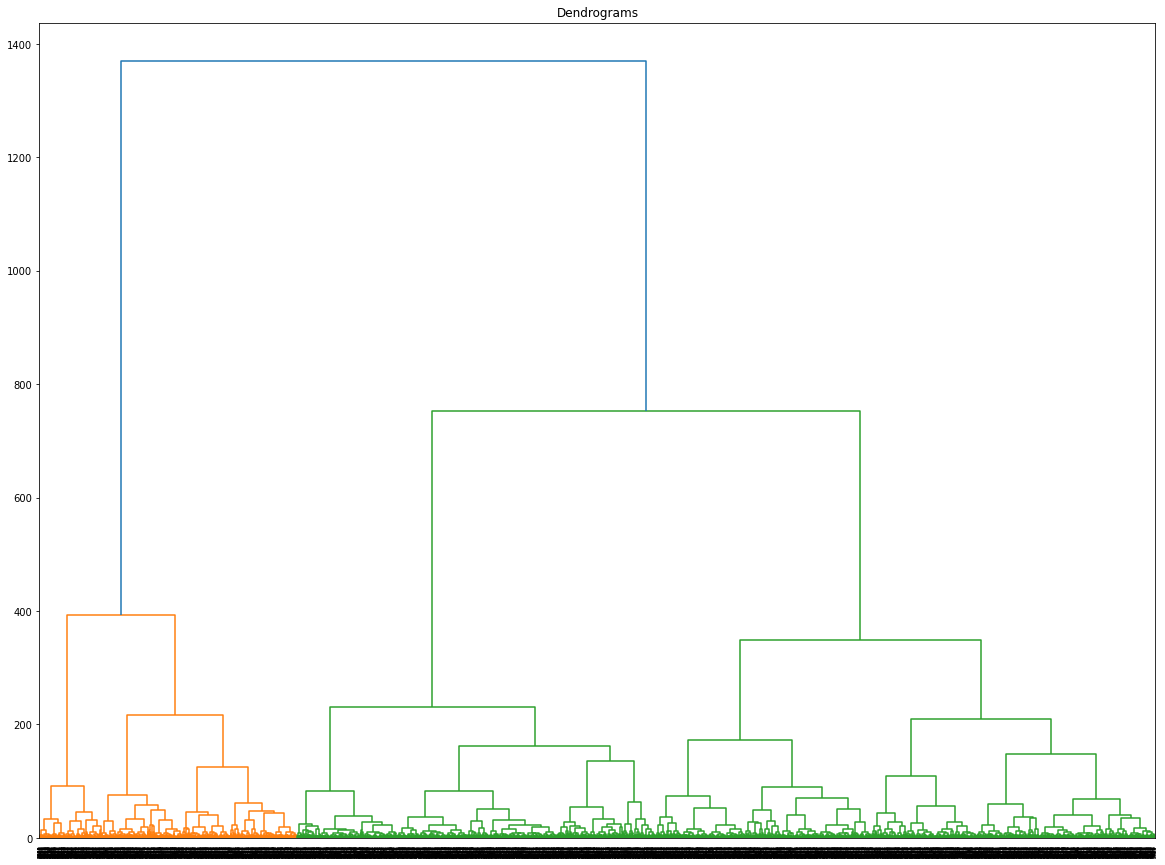

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_train, method='ward'))

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(X)

In [22]:
v['cluster'] = pd.DataFrame(y_hc)


In [23]:
list(v.columns.values)

['Age',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Gender_Female',
 'Gender_Male',
 'Ever_Married_No',
 'Ever_Married_Yes',
 'Graduated_No',
 'Graduated_Yes',
 'Profession_Artist',
 'Profession_Doctor',
 'Profession_Engineer',
 'Profession_Entertainment',
 'Profession_Executive',
 'Profession_Healthcare',
 'Profession_Homemaker',
 'Profession_Lawyer',
 'Profession_Marketing',
 'Var_1_Cat_1',
 'Var_1_Cat_2',
 'Var_1_Cat_3',
 'Var_1_Cat_4',
 'Var_1_Cat_5',
 'Var_1_Cat_6',
 'Var_1_Cat_7',
 'Segmentation_A',
 'Segmentation_B',
 'Segmentation_C',
 'Segmentation_D',
 'cluster']

In [24]:
import plotly as py
import plotly.graph_objs as go

In [25]:
trace1 = go.Scatter3d(
    x= v['Age'],
    y= v['Spending_Score'],
    z= v['Work_Experience'],
    mode='markers',
     marker=dict(
        color = v['cluster'], 
        size= 4,
        line=dict(
            color= v['cluster'],
            width= 5
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Work Ex')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [26]:
v

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D,cluster
0,22,1.0,1,4.0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,1.0
2,67,1.0,1,1.0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,2.0
3,67,0.0,5,2.0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0.0
5,56,0.0,10,2.0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1.0
6,32,1.0,1,3.0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5,5.0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,NaN
8064,35,3.0,1,4.0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,NaN
8065,33,1.0,1,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,NaN
8066,27,1.0,1,4.0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,NaN


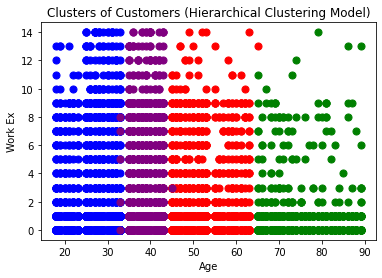

In [27]:
X = v.iloc[:, [0,1]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=50, c='purple', label ='Cluster 4')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Age')
plt.ylabel('Work Ex')
plt.show()

In [28]:
from sklearn import decomposition
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn import datasets
from sklearn import linear_model


In [29]:
pca=decomposition.PCA()
data_pca=pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.01703150e-01, 4.57281289e-02, 3.78942478e-02, 6.84557122e-03,
       1.71507710e-03, 1.49754353e-03, 8.80941842e-04, 7.03772544e-04,
       6.40148326e-04, 4.04141695e-04, 3.69422749e-04, 3.40975727e-04,
       2.70810062e-04, 2.32879963e-04, 2.09357263e-04, 1.60800750e-04,
       1.19243638e-04, 9.78609958e-05, 8.29550149e-05, 5.93671225e-05,
       4.36037954e-05, 8.93741989e-33, 8.93741989e-33, 8.93741989e-33,
       8.93741989e-33, 8.93741989e-33])

In [30]:
pca.explained_variance_ratio_.sum()

1.0

In [31]:
sum=0
for i in range (0,9):
    sum=sum+pca.explained_variance_ratio_[i]
    if(sum>0.95):
        print(i+1)
        break

3


therefore we require only first three variables to explain more than 95% variance of the data using PCA decomposition

In [32]:
from sklearn.decomposition import TruncatedSVD

In [38]:
sum=0
for i in range (1,9):
    svd = TruncatedSVD(n_components=i)
    X_reduced = svd.fit_transform(X)
    sum=svd.explained_variance_ratio_.sum()
    if(sum>0.95):
        print(i)
        break


1
